In [82]:
import pandas as pd
df = pd.read_csv('data/Raw/quinhentas_respostas.csv')
respdf = pd.read_csv('data/Raw/quinhentas_perguntas.csv')
df.head()

,index,resposta
0,1,Os cuidados com o bezerro devem começar ainda ...
1,2,"Logo após o nascimento, inspeciona-se o bezerr..."
2,3,As causas do nascimento de bezerros fracos e p...
3,4,O mais indicado é criar os bezerros em abrigos...
4,5,A escolha de um ou outro sistema depende do pr...


In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('index').resposta.count().plot.bar(ylim=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


<Figure size 800x600 with 1 Axes>

In [117]:
def category_id(row):
    topics = [40, 134, 289, 339, 379, 414, 449, 457, 468, 482, 500]
    topic = 1
    while True:
        if row['index']<= topics[topic-1]:
            return topic;
        else:
            topic+=1

def category_name(row):
    topics = [40, 134, 289, 339, 379, 414, 449, 457, 468, 482, 500]
    topic_name=['1. Cria e Recria de Bezerros', '2. Alimentação e Manejo de Vacas e Touros', '3. Recursos Forrageiros', '4. Reprodução', '5. Melhoramento Genético Animal', '6. Saúde Animal', '7. Mastite e Qualidade do Leite', '8. Produção Orgânica', '9. Gerenciamento', '10. Bem-estar Animal', '11. Instalações, Ambiência e Manejo de Dejetos']
    topic = 1
    while True:
        if row['index']<= topics[topic-1]:
            return topic_name[topic-1];
        else:
            topic+=1

In [118]:
from io import StringIO
df['Category_id'] = df.apply(category_id, axis=1)
df['Category_name'] = df.apply(category_name, axis=1)
respdf['Category_id'] = df.apply(category_id, axis=1)
respdf['Category_name'] = df.apply(category_name, axis=1)
category_id_df = df[['Category_id', 'Category_name']].drop_duplicates().sort_values('Category_id')
category_to_id = dict(category_id_df.values)

#id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.tail()

,index,resposta,Category_id,Category_name
495,496,A água é um recurso essencial para a vida do h...,11,"11. Instalações, Ambiência e Manejo de Dejetos"
496,497,A estimativa do consumo de água pelo gado leit...,11,"11. Instalações, Ambiência e Manejo de Dejetos"
497,498,A dureza da água está relacionada à presença d...,11,"11. Instalações, Ambiência e Manejo de Dejetos"
498,499,Pastagens tenras de gramíneas tropicais possib...,11,"11. Instalações, Ambiência e Manejo de Dejetos"
499,500,As seguintes recomendações para uso de bebedou...,11,"11. Instalações, Ambiência e Manejo de Dejetos"


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load('pt')
spacy_stopwords = list(spacy.lang.pt.stop_words.STOP_WORDS)


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=spacy_stopwords)
features = tfidf.fit_transform(df.resposta).toarray()
features2 = tfidf.transform(respdf.pergunta).toarray()
labels = df.Category_name
labels2 = respdf.Category_name
features2.shape

(500, 1507)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
category_to_id

{1: 'Os cuidados com o bezerro devem começar ainda na fase de gestação. A fase de maior crescimento do feto se dá nos últimos 3 meses de gestação. Assim, a vaca gestante e em lactação deve ser seca 60 dias antes da data prevista para o parto, para a recuperação da glândula mamária e a produção de colostro. A influência da alimentação pré-natal é crítica, tanto para o crescimento normal do feto quanto para a sobrevivência do bezerro durante as primeiras semanas de vida. No que se refere ao aspecto nutricional, as deficiências de energia, minerais e vitaminas são consideradas as mais importantes. O teor de proteína da dieta (volumoso mais concentrado) da vaca nesse período não deve ser inferior a 14% na base da matéria seca (MS). Mas deve-se evitar que a vaca esteja muito gorda pois há riscos de problemas no parto. Assim, de 20 a 30 dias antes do parto, as vacas devem ser conduzidas ao pasto ou ao piquete maternidade, que deve estar seco, limpo e localizado próximo às instalações princip

In [11]:
from sklearn.feature_selection import chi2
import numpy as np


N = 2
for category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  #print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo p

  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo p

. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most corre

. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most corre

. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most corre

  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido
  . Most correlated unigrams:
. esterco
. mastite
  . Most correlated bigrams:
. custo produção
. esterco líquido


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['resposta'], df['Category_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [66]:
perg = pd.read_csv('data/Raw/quinhentas_perguntas.csv')
results = pd.DataFrame(columns=['Network','DecayRate','PreciseHits','Pct Hits', 'Window', 'HitsInWindow', 'PctHitsInWindow'])
hits = 0
recall = 0
for idx, row in perg.iterrows():
    print(idx, category(row), '/', clf.predict(count_vect.transform([row['pergunta']]))[0])
    hits += (category(row) == clf.predict(count_vect.transform([row['pergunta']]))[0])
results = results.append({"Network":'Bayes', "DecayRate":"N/A", "PreciseHits":hits, "Pct Hits":hits/500, "Window":'N/A', "HitsInWindow":'N/A', "PctHitsInWindow":'N/A'}, ignore_index=True)


0 1 / 3
1 1 / 3
2 1 / 3
3 1 / 3
4 1 / 3
5 1 / 7
6 1 / 3
7 1 / 3
8 1 / 3
9 1 / 3
10 1 / 3
11 1 / 3
12 1 / 2
13 1 / 3
14 1 / 2
15 1 / 2
16 1 / 3
17 1 / 3
18 1 / 3
19 1 / 3
20 1 / 3
21 1 / 3
22 1 / 3
23 1 / 3
24 1 / 3
25 1 / 3
26 1 / 3
27 1 / 3
28 1 / 3
29 1 / 2
30 1 / 3
31 1 / 3
32 1 / 3
33 1 / 3
34 1 / 3
35 1 / 3
36 1 / 3
37 1 / 3
38 1 / 3
39 1 / 3
40 2 / 3
41 2 / 2
42 2 / 3
43 2 / 3
44 2 / 3
45 2 / 3
46 2 / 2
47 2 / 3
48 2 / 2
49 2 / 3
50 2 / 2
51 2 / 3
52 2 / 2
53 2 / 2
54 2 / 3
55 2 / 3
56 2 / 2
57 2 / 3
58 2 / 2
59 2 / 3
60 2 / 3
61 2 / 3
62 2 / 2
63 2 / 3
64 2 / 3
65 2 / 3
66 2 / 2
67 2 / 3
68 2 / 3
69 2 / 2
70 2 / 3
71 2 / 3
72 2 / 3
73 2 / 3
74 2 / 3
75 2 / 2
76 2 / 3
77 2 / 3
78 2 / 3
79 2 / 3
80 2 / 3
81 2 / 3
82 2 / 3
83 2 / 3
84 2 / 2
85 2 / 2
86 2 / 3
87 2 / 2
88 2 / 3
89 2 / 3
90 2 / 3
91 2 / 2
92 2 / 2
93 2 / 2
94 2 / 3
95 2 / 2
96 2 / 2
97 2 / 2
98 2 / 2
99 2 / 2
100 2 / 2
101 2 / 2
102 2 / 2
103 2 / 3
104 2 / 2
105 2 / 2
106 2 / 2
107 2 / 2
108 2 / 2
109 2 / 2
110 2 / 3


In [20]:
results

,Network,DecayRate,PreciseHits,Pct Hits,Window,HitsInWindow,PctHitsInWindow
0,Bayes,N/A,207,0.414,N/A,N/A,N/A


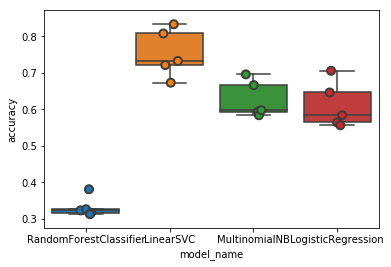

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [34]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.753801
LogisticRegression        0.611513
MultinomialNB             0.627780
RandomForestClassifier    0.332334
Name: accuracy, dtype: float64

In [46]:
category_id_df.Category_name.values

array(['Cria e Recria', 'Alimentação', 'Recursos Forrageiros',
       'Reprodução', 'Melhoramento Genético', 'Saúde Animal',
       'Mastite e Qualidade do Leite', 'Produção Orgânica',
       'Gerenciamento', 'Bem-estar Animal', 'Instalações'], dtype=object)

0.6606060606060606


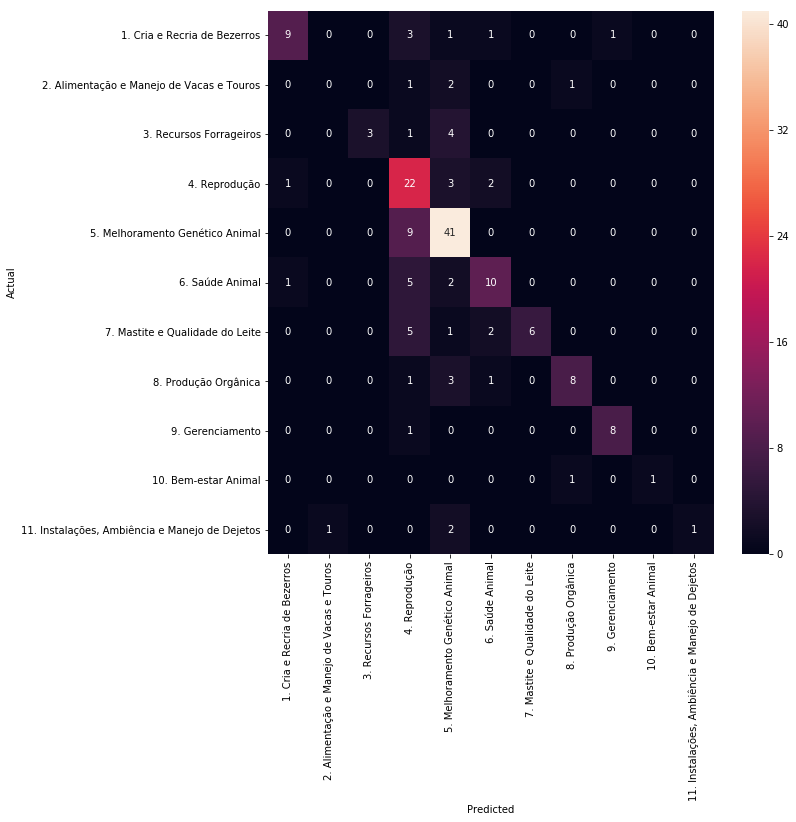

In [120]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
dub, X_test2, dab, y_test2, indices_train2, indices_test2 = train_test_split(features2, labels2, respdf.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test2)
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test2, y_pred))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test2, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category_name.values, yticklabels=category_id_df.Category_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [124]:
for idx, row in perg.iterrows():
    print(model.predict(tfidf.transform([row['pergunta']])))

['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['7. Mastite e Qualidade do Leite']
['2. Alimentação e Manejo de Vacas e Touros']
['2. Alimentação e Manejo de Vacas e Touros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['4. Reprodução']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['1. Cria e Recria de Bezerros']
['2. Alimentação e Manejo de Vacas e Touros']
['1. Cria e Recria de Bezerros']
['3. Recursos Forrageiros']
['1. Cria e Recria de

['4. Reprodução']
['3. Recursos Forrageiros']
['1. Cria e Recria de Bezerros']
['2. Alimentação e Manejo de Vacas e Touros']
['4. Reprodução']
['2. Alimentação e Manejo de Vacas e Touros']
['4. Reprodução']
['3. Recursos Forrageiros']
['2. Alimentação e Manejo de Vacas e Touros']
['3. Recursos Forrageiros']
['4. Reprodução']
['4. Reprodução']
['4. Reprodução']
['4. Reprodução']
['4. Reprodução']
['5. Melhoramento Genético Animal']
['3. Recursos Forrageiros']
['2. Alimentação e Manejo de Vacas e Touros']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['3. Recursos Forrageiros']
['2. Alimentação e Manejo de Vacas e Touros']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['5. Melhoramento Genético Animal']
['2. Alimentação e Manejo de Vacas e Touros']
['2. Alimentação e Manejo de Vacas e Touros']
[